In [2]:
import tflearn
import numpy as np
import pickle
import os
from tflearn.optimizers import SGD
from plot_samples import plot_samples

from write_submission import write_submission

import matplotlib
%matplotlib inline

In [3]:
from tflearn.optimizers import SGD, Adam, Momentum

In [4]:
# Choose model architecture
#import v1_single_layer as m
import v2_convnet as m

In [5]:
# Load data
(X, Y), (X_test, _) = pickle.load(open("data.p", "rb"))

In [6]:
#optimizer_ = m.optimizer()
# Adjust hyperparameters
#optimizer_ = SGD(learning_rate=0.7, lr_decay=0.96, decay_step=2400)
optimizer_ = Adam()
#optimizer_ = Momentum(learning_rate=0.01, momentum = 0.9, lr_decay=0.96, decay_step=100)

In [7]:
regression_ = tflearn.regression(m.network(), optimizer=optimizer_, loss='mean_square')

In [8]:
model = tflearn.DNN(regression_, checkpoint_path='models/checkpoints/model.tfl.ckpt', max_checkpoints=3, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/')

In [9]:
# Optionally load weights from a checkpoint or a previous save
#model.load("models/checkpoints/model.tfl.ckpt")
#model.load("models/v2-convnet-ep-100/model.tflearn")
model.load("models/v3-convnet-ep-400-adam/model.tflearn")

In [14]:
model.fit(X, Y, run_id='v3-convnet-adam', n_epoch=200, validation_set=0.1, shuffle=True, show_metric=True, batch_size=64, snapshot_step=200, snapshot_epoch=False)

Training Step: 12399  | total loss: 0.00060 | time: 5.649s
| Adam | epoch: 300 | loss: 0.00060 - acc: 0.8453 -- iter: 1920/1926
Training Step: 12400  | total loss: 0.00061 | time: 6.851s
| Adam | epoch: 300 | loss: 0.00061 - acc: 0.8421 | val_loss: 0.00070 - val_acc: 0.7944 -- iter: 1926/1926
--


In [15]:
os.mkdir("models/v3-convnet-ep-400-adam")

In [16]:
model.save('models/v3-convnet-ep-400-adam/model.tflearn')

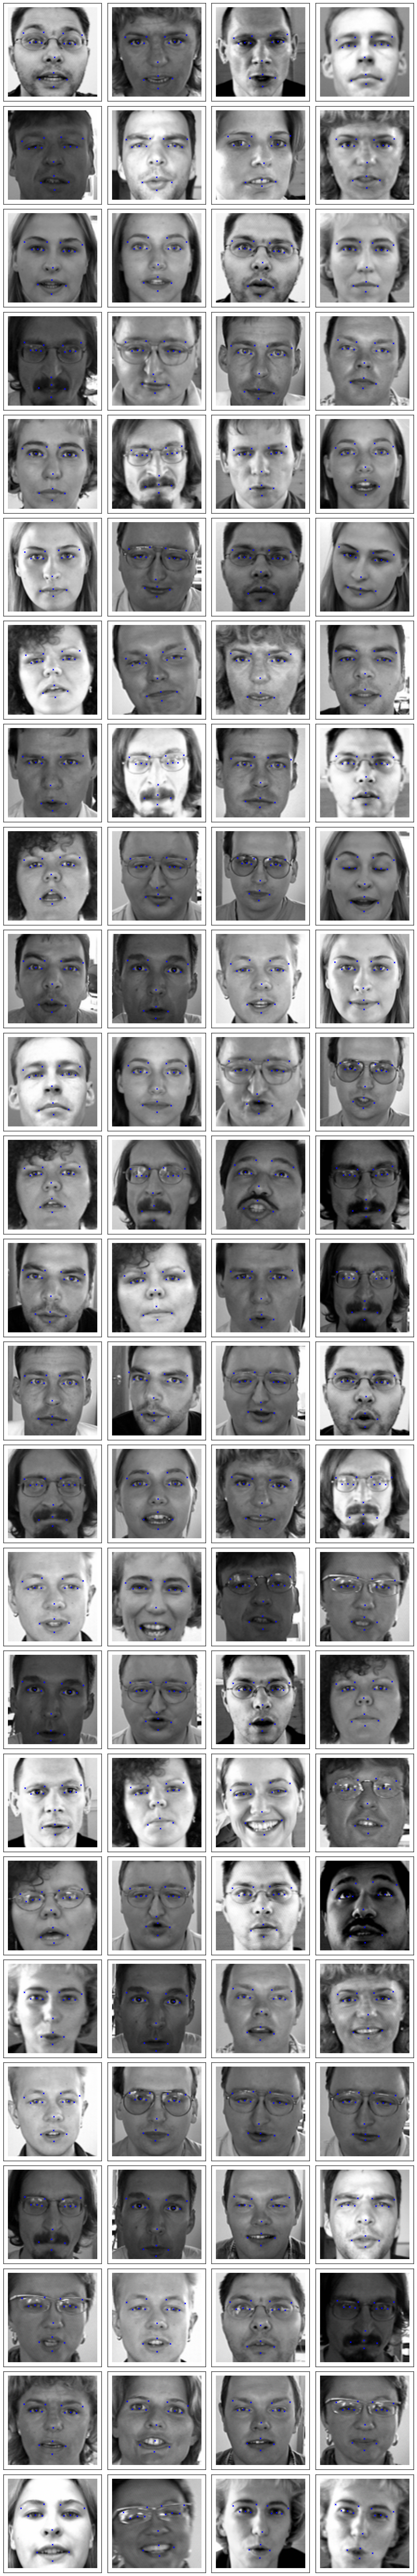

In [12]:
plot_samples(X_test[:100], np.array(model.predict(X_test[:100])), n=100)

In [18]:
Y1 = model.predict(X_test[:1000])
Y2 = model.predict(X_test[1000:])
write_submission(np.array(Y1 + Y2))

Wrote submission/submission-2017-01-17T06-22-58.308056.csv


In [ ]:
# v1-single-layer - Epochs: 300 Loss: 0.00210 Kaggle Rank: 139 Kaggle Score: 3.82858
# v2-convnet-ep-100-sgd - Epochs: 100 Loss: 0.00190 Kaggle Rank: 81 Kaggle Score: 3.41680
# v3-convnet-ep-100-adam - Epochs: 100 Loss: 0.00120 Kaggle Rank: 63 Kaggle Score: 3.05794